# Importing Libraries

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score, make_scorer

import ast

In [64]:
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score, confusion_matrix

In [2]:
import json

In [3]:
import warnings
warnings.filterwarnings('ignore')

# Loading the Data Samples

In [4]:
f = open("bank_statement_data.json")
first_bank_data = json.load(f)
first_bank_data.keys()

dict_keys(['id', 'platform', 'banking'])

In [5]:
print(first_bank_data["id"], first_bank_data["platform"])

xxxx multi_bank_ocr


From the `json` sample data, it consist of the id, platform, and banking section. The useful information that we can use for the assignment purpose located in the `banking` section

In [6]:
first_bank_data["banking"].keys()

dict_keys(['Account', 'Transactions', 'Credit', 'Credits Overview', 'Debit', 'Debits Overview', 'Analysis'])

Inside the `banking` section, there are  several informations available provided from the bank statement OCR service such as account holder details, detailed transactions, credit and debit aggregated information, with the analysis information

In [7]:
first_bank_data["banking"]["Account"]

[{'Account Holder name': 'BAYU KURNIAWAN',
  'Account Number': '6280723124',
  'Address': 'MUNJUL RT 08 RW 002 CIPAYUNG GG BUNTU NO 22 JAKARTA 13850 INDONESIA',
  'Bank Name': 'BCA',
  'Period': 'July 2023, August 2023, September 2023',
  'Type': 'REKENING TAHAPAN'}]

In [8]:
first_bank_data["banking"]["Analysis"]

{'6280723124': [{'Ending balances': 10555228.07,
   'Starting balances': 1422946.07,
   'average_EOD_balance': 6926185.13,
   'index': 'Jul-2023',
   'max_EOD_balance': 20504443.07,
   'min_EOD_balance': 72343.07,
   'month': 'Jul-2023',
   'total_amount_of_cash_deposits': 0.0,
   'total_amount_of_cash_withdrawals': 0.0,
   'total_amount_of_credit_transactions': 122049000.0,
   'total_amount_of_debit_transactions': 112916718.0,
   'total_credit_transactions': 46,
   'total_debit_transactions': 107,
   'total_number_of_cash_deposits': 0,
   'total_number_of_cash_withdrawals': 0},
  {'Ending balances': 2665921.07,
   'Starting balances': 10555228.07,
   'average_EOD_balance': 3575942.39,
   'index': 'Aug-2023',
   'max_EOD_balance': 11647928.07,
   'min_EOD_balance': 53828.07,
   'month': 'Aug-2023',
   'total_amount_of_cash_deposits': 0.0,
   'total_amount_of_cash_withdrawals': 0.0,
   'total_amount_of_credit_transactions': 103866000.0,
   'total_amount_of_debit_transactions': 111755307

In [9]:
first_bank_df = pd.DataFrame(first_bank_data["banking"]["Transactions"])

In [10]:
first_bank_df.head()

,Account Number,Amount,Balance,Bank Name,Category,Date,Descriptor,Detail,Month,Name,Serial Number,Type
0,6280723124,0.0,10555228.07,BCA,SALDO AWAL,2023-08-01,SALDO AWAL,SALDO AWAL,Aug-2023,SALDO AWAL,1,CREDIT
1,6280723124,500000.0,11055228.07,BCA,TRANSFER FROM NYICIL CASBON BINTORO,2023-08-01,TRSF E-BANKING CR TANGGAL :31/07,TRSF E-BANKING CR TANGGAL :31/07 3107/FTSCY/WS...,Aug-2023,NYICIL CASBON BINTORO,2,CREDIT
2,6280723124,-800000.0,10255228.07,BCA,TRANSFER TO YUYUN EKA WIYANTI M,2023-08-01,SWITCHING DB,SWITCHING DB TRANSFER KE 002 YUYUN EKA WIYANTI...,Aug-2023,YUYUN EKA WIYANTI M,3,DEBIT
3,6280723124,-6500.0,10248728.07,BCA,TRANSFER TO YUYUN EKA WIYANTI M,2023-08-01,SWITCHING DB,SWITCHING DB TRANSFER KE 002 YUYUN EKA WIYANTI...,Aug-2023,YUYUN EKA WIYANTI M,4,DEBIT
4,6280723124,-100000.0,10148728.07,BCA,TRANSFER TO DEPOSIT SELLA NUR FAUZIAH SALIM,2023-08-02,TRSF E-BANKING DB,TRSF E-BANKING DB 0208/FTSCY/WS95031 100000.00...,Aug-2023,DEPOSIT SELLA NUR FAUZIAH SALIM,5,DEBIT


In [11]:
first_bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416 entries, 0 to 415
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Account Number  416 non-null    object 
 1   Amount          416 non-null    float64
 2   Balance         416 non-null    float64
 3   Bank Name       416 non-null    object 
 4   Category        416 non-null    object 
 5   Date            416 non-null    object 
 6   Descriptor      416 non-null    object 
 7   Detail          416 non-null    object 
 8   Month           416 non-null    object 
 9   Name            416 non-null    object 
 10  Serial Number   416 non-null    object 
 11  Type            416 non-null    object 
dtypes: float64(2), object(10)
memory usage: 39.1+ KB


In [12]:
f = open("raw_29f9375727654c7cab56213b39702ba7_multi_bank_ocr_insights_data.txt")
second_data = ast.literal_eval(f.read())

In [13]:
second_data.keys()

dict_keys(['id', 'platform', 'multi_bank_ocr'])

In [14]:
second_data["multi_bank_ocr"]["Account"]

[{'Account Holder name': 'JEKAEL INVESCO',
  'Account Number': '1660003120599',
  'Address': '',
  'Bank Name': 'MANDIRI',
  'Period': 'July 2023',
  'Type': ''}]

In [15]:
second_bank_df = pd.DataFrame(second_data["multi_bank_ocr"]["Transactions"])
second_bank_df.head()

,Account Number,Amount,Balance,Bank Name,Category,Date,Descriptor,Detail,Month,Name,Serial Number,Type
0,1660003120599,16285241.0,2.507307e+07,MANDIRI,TRANSFER FROM CBC NO LISTRIK IPL ME KREDIT SAP,2023-07-03,"CBC-NO.448/INV/JI/VI/2023 LISTRIK,IPL ME Kredi...",-,Jul-2023,CBC NO LISTRIK IPL ME KREDIT SAP,1,CREDIT
1,1660003120599,541125.0,2.561420e+07,MANDIRI,TRANSFER FROM PEMB AQUA NO KREDIT SAP,2023-07-04,15637N-PEMB AQUA NO. 420/INV/JI/VI/2023 Kredit...,-,Jul-2023,PEMB AQUA NO KREDIT SAP,2,CREDIT
2,1660003120599,9320000.0,3.493420e+07,MANDIRI,TRANSFER FROM REIMBURSMENT ACCU GEN KREDIT SAP,2023-07-04,458/INV/JI/VI/2023 REIMBURSMENT ACCU GEN Kredi...,-,Jul-2023,REIMBURSMENT ACCU GEN KREDIT SAP,3,CREDIT
3,1660003120599,58124595.0,9.305879e+07,MANDIRI,TRANSFER FROM JASA PENGELOLAAN GEDU KREDIT SAP,2023-07-04,451/INV/JI/VI/2023 JASA PENGELOLAAN GEDU Kredi...,-,Jul-2023,JASA PENGELOLAAN GEDU KREDIT SAP,4,CREDIT
4,1660003120599,58124595.0,1.511834e+08,MANDIRI,TRANSFER FROM JASA OUTSOURCING KREDIT SAP,2023-07-04,371/INV/JI/V/2023 JASA OUTSOURCING Kredit SAP ...,- -,Jul-2023,JASA OUTSOURCING KREDIT SAP,5,CREDIT


In [16]:
f = open("raw_5227c2f552b54c1aa174f3cf5a1428ca_ocbc_id_insights_data.txt")
third_data = ast.literal_eval(f.read())

In [17]:
third_bank_df = pd.DataFrame(third_data["ocbc_id"]["Transactions"])
third_bank_df.head()

,Account Number,Amount,Balance,Bank Name,Category,Date,Descriptor,Detail,Month,Name,Serial Number,Type
0,280800001560,2.500000e+08,-4.099063e+09,OCBC_ID,TRANSFER FROM TRANSFER MASUK BI FAST WAHYONOLA...,2023-01-03,079 Transfer Masuk BI Fast WAHYONO/Lainnya,,Jan-2023,TRANSFER MASUK BI FAST WAHYONOLAINNYA,1,CREDIT
1,280800001560,5.000000e+08,-3.599063e+09,OCBC_ID,TRANSFER FROM TRANSFER MASUK INWARD RTGS CR WA...,2023-01-03,014 Transfer Masuk (INWARD RTGS CR) WAHYONO/,,Jan-2023,TRANSFER MASUK INWARD RTGS CR WAHYONO,2,CREDIT
2,280800001560,2.000000e+08,-3.399063e+09,OCBC_ID,TRANSFER FROM TRANSFER MASUK TRF CNSKN MSK WAH...,2023-01-03,014 Transfer Masuk (TRF CN-SKN MSK) WAHYONO/,,Jan-2023,TRANSFER MASUK TRF CNSKN MSK WAHYONO,3,CREDIT
3,280800001560,1.000000e+09,-2.399063e+09,OCBC_ID,TRANSFER FROM MASUK INWARD CR WIJAYA ANUGRAHRT...,2023-01-03,014 Transfer Masuk (INWARD RTGS CR) WIJAYA KAR...,,Jan-2023,MASUK INWARD CR WIJAYA ANUGRAHRTGS FEE KARYA,4,CREDIT
4,280800001560,-1.100000e+09,-3.499063e+09,OCBC_ID,TRANSFER TO PEMINDAHBUKUAN PEMBAYARAN POKOK,2023-01-04,004 Pemindahbukuan PEMBAYARAN POKOK 280830030290,,Jan-2023,PEMINDAHBUKUAN PEMBAYARAN POKOK,5,DEBIT


# Objective: Building a simple credit risk assessment model based on bank statement data

The approach that are made in the following notebook is a classification algorithm based for the credit risk assessment. In the classification algorithm, there are two key informations needed, the features (independent variable) and the label (dependent variable)

The current notebook approach is to create the classification algorithm on the bank statement transaction level such that we could identify the bad / risky transactions made (similar like a fraud transaction detection)

**Data Available**
1. Bank Statement Data

**Unavailable / Ungiven Data**
1. Label (Bad / Good)

# Credit Risk Assessment Approach

#### Transaction Data Inspection

In [18]:
first_bank_df.head()

,Account Number,Amount,Balance,Bank Name,Category,Date,Descriptor,Detail,Month,Name,Serial Number,Type
0,6280723124,0.0,10555228.07,BCA,SALDO AWAL,2023-08-01,SALDO AWAL,SALDO AWAL,Aug-2023,SALDO AWAL,1,CREDIT
1,6280723124,500000.0,11055228.07,BCA,TRANSFER FROM NYICIL CASBON BINTORO,2023-08-01,TRSF E-BANKING CR TANGGAL :31/07,TRSF E-BANKING CR TANGGAL :31/07 3107/FTSCY/WS...,Aug-2023,NYICIL CASBON BINTORO,2,CREDIT
2,6280723124,-800000.0,10255228.07,BCA,TRANSFER TO YUYUN EKA WIYANTI M,2023-08-01,SWITCHING DB,SWITCHING DB TRANSFER KE 002 YUYUN EKA WIYANTI...,Aug-2023,YUYUN EKA WIYANTI M,3,DEBIT
3,6280723124,-6500.0,10248728.07,BCA,TRANSFER TO YUYUN EKA WIYANTI M,2023-08-01,SWITCHING DB,SWITCHING DB TRANSFER KE 002 YUYUN EKA WIYANTI...,Aug-2023,YUYUN EKA WIYANTI M,4,DEBIT
4,6280723124,-100000.0,10148728.07,BCA,TRANSFER TO DEPOSIT SELLA NUR FAUZIAH SALIM,2023-08-02,TRSF E-BANKING DB,TRSF E-BANKING DB 0208/FTSCY/WS95031 100000.00...,Aug-2023,DEPOSIT SELLA NUR FAUZIAH SALIM,5,DEBIT


In [19]:
first_bank_df.describe()

,Amount,Balance
count,4.160000e+02,4.160000e+02
mean,1.525663e+05,6.738730e+06
std,7.437632e+06,1.097985e+07
min,-7.700000e+07,5.382807e+04
25%,-5.000000e+05,1.122321e+06
50%,-1.000000e+05,3.166378e+06
75%,2.000000e+05,8.949946e+06
max,7.680778e+07,8.131930e+07


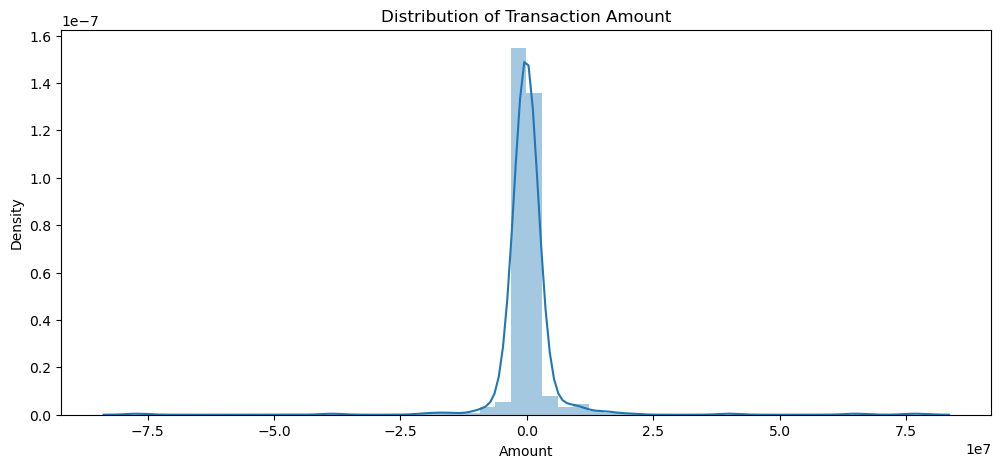

In [20]:
plt.figure(figsize=(12,5))
plt.title("Distribution of Transaction Amount")
ax = sns.distplot(first_bank_df["Amount"])
plt.show()

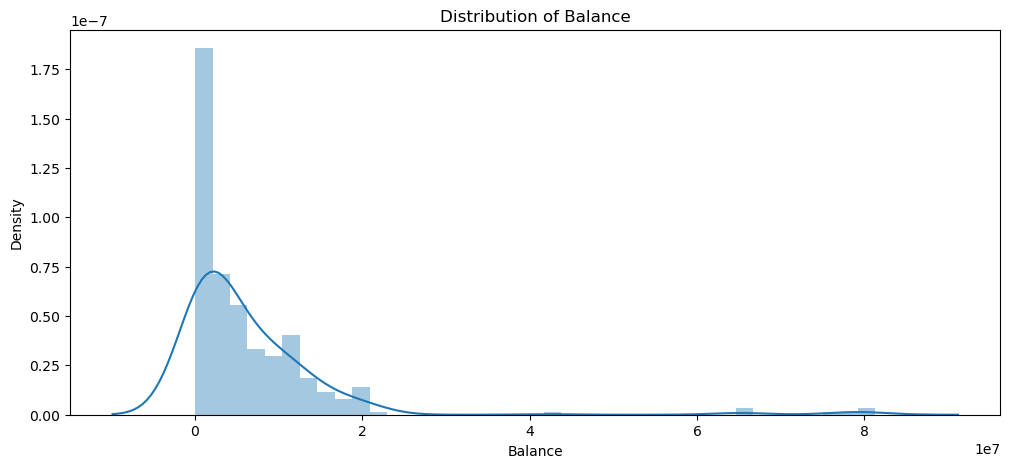

In [21]:
plt.figure(figsize=(12,5))
plt.title("Distribution of Balance")
ax = sns.distplot(first_bank_df["Balance"])
plt.show()

From the above plot, there are few summary:
1. The `balance` amount for the first bank statement data, have multiple instances which causing the balance falls below 0 (overdraft payment), which could be an indication of the `risky` transaction

In [22]:
master_bank_df = pd.concat([first_bank_df, second_bank_df, third_bank_df])

In [23]:
master_bank_df.columns

Index(['Account Number', 'Amount', 'Balance', 'Bank Name', 'Category', 'Date',
       'Descriptor', 'Detail', 'Month', 'Name', 'Serial Number', 'Type'],
      dtype='object')

## Label Data Creation

### Transaction Data Cleansing

In [24]:
# remove saldo awal transaction

In [25]:
master_bank_df = master_bank_df[~master_bank_df['Category'].str.contains('SALDO AWAL')]

In [26]:
master_bank_df = master_bank_df[~master_bank_df["Name"].str.contains("ATM WITHDRAWAL")]

In [27]:
master_bank_df = master_bank_df[~master_bank_df["Detail"].str.contains("BIAYA TXN")]

### 1st Approach - Clustering Approach

Bad and good assessment are define based on the transaction level, if there is a transaction which is very different from the transactions made by the sample customers, we could potentially flag this transaction as a "risky" transaction

##### Cluster Creation - DBScan Algorithm 

In [28]:
master_bank_df.head()

,Account Number,Amount,Balance,Bank Name,Category,Date,Descriptor,Detail,Month,Name,Serial Number,Type
1,6280723124,500000.0,11055228.07,BCA,TRANSFER FROM NYICIL CASBON BINTORO,2023-08-01,TRSF E-BANKING CR TANGGAL :31/07,TRSF E-BANKING CR TANGGAL :31/07 3107/FTSCY/WS...,Aug-2023,NYICIL CASBON BINTORO,2,CREDIT
2,6280723124,-800000.0,10255228.07,BCA,TRANSFER TO YUYUN EKA WIYANTI M,2023-08-01,SWITCHING DB,SWITCHING DB TRANSFER KE 002 YUYUN EKA WIYANTI...,Aug-2023,YUYUN EKA WIYANTI M,3,DEBIT
3,6280723124,-6500.0,10248728.07,BCA,TRANSFER TO YUYUN EKA WIYANTI M,2023-08-01,SWITCHING DB,SWITCHING DB TRANSFER KE 002 YUYUN EKA WIYANTI...,Aug-2023,YUYUN EKA WIYANTI M,4,DEBIT
4,6280723124,-100000.0,10148728.07,BCA,TRANSFER TO DEPOSIT SELLA NUR FAUZIAH SALIM,2023-08-02,TRSF E-BANKING DB,TRSF E-BANKING DB 0208/FTSCY/WS95031 100000.00...,Aug-2023,DEPOSIT SELLA NUR FAUZIAH SALIM,5,DEBIT
5,6280723124,600000.0,10748728.07,BCA,TRANSFER FROM BINTORO,2023-08-02,TRSF E-BANKING CR,TRSF E-BANKING CR 0208/FTSCY/WS95031 600000.00...,Aug-2023,BINTORO,6,CREDIT


Numerical Column Selection for Clustering

The `balance` and `amount` is utilized to identify the risky transaction as this is potentially the most important factors and the other columns may not have beneficial information. If I were given more time, I would like to explore utilizing other columns such as the `Category`, `Detail`, and `Name` but it needs to be transformed and encoded in such that it will extract more information which will be beneficial in creating the label `risky` and `non-risky transaction`

In [29]:
cluster_data = master_bank_df[["Balance", "Amount"]]
# the first record needs to be dropped due to the it's just a first snapshot of the data

In [30]:
from sklearn.cluster import DBSCAN

**Defining Epsilon**

In [31]:
x = cluster_data.values

In [32]:
from sklearn.neighbors import NearestNeighbors # importing the library
neighb = NearestNeighbors(n_neighbors=2) # creating an object of the NearestNeighbors class
nbrs=neighb.fit(x) # fitting the data to the object
distances,indices=nbrs.kneighbors(x) # finding the nearest neighbours

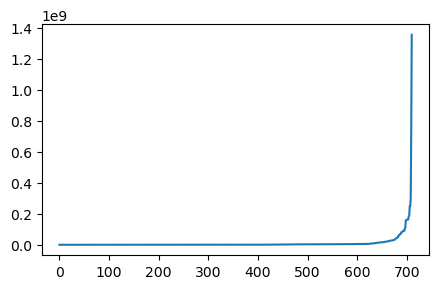

In [33]:
# Sort and plot the distances results
distances = np.sort(distances, axis = 0) # sorting the distances
distances = distances[:, 1] # taking the second column of the sorted distances
plt.rcParams['figure.figsize'] = (5,3) # setting the figure size
plt.plot(distances) # plotting the distances
plt.show() # showing the plot

From the above plot, the x axis shows the distance between each cluster and the y axis shows the epsilon treshold needed to create a cluster with DBScan algorithm. It is shown that epsilon at 0.2e109 is the optimum number as the treshold

In [34]:
from sklearn.cluster import DBSCAN
# cluster the data into five clusters
dbscan = DBSCAN(eps = 0.2e9, min_samples = 10).fit(x) # fitting the model
labels = dbscan.labels_ # getting the labels

In [35]:
cluster_data.head(2)

,Balance,Amount
1,11055228.07,500000.0
2,10255228.07,-800000.0


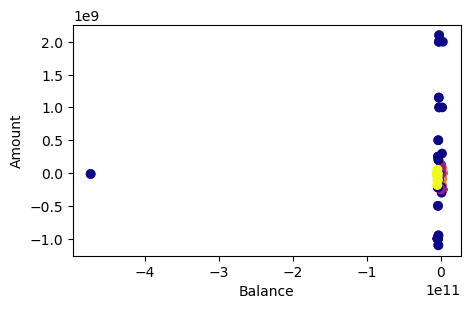

In [36]:
# Plot the clusters
plt.scatter(x[:, 0], x[:,1], c = labels, cmap= "plasma") # plotting the clusters
plt.xlabel("Balance") # X-axis label
plt.ylabel("Amount") # Y-axis label
plt.show() # showing the plot

In [37]:
from sklearn.metrics import silhouette_score

# Assuming 'labels' is the cluster labels assigned by DBSCAN
silhouette_avg = silhouette_score(x, labels)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.7543064179142073


A score close to 1 suggests that the data points are well-clustered, and each point is closer to the members of its own cluster than to those in other clusters.

In [38]:
pd.DataFrame(x)

,0,1
0,1.105523e+07,500000.0
1,1.025523e+07,-800000.0
2,1.024873e+07,-6500.0
3,1.014873e+07,-100000.0
4,1.074873e+07,600000.0
...,...,...
706,-4.788594e+09,-30000.0
707,-4.731375e+11,-14355776.0
708,-4.681375e+09,50000000.0
709,-4.697499e+09,-16108.0


In [39]:
labels

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

However, the number of clusters generated by DBScan is more than two clusters. Based on our goal, we want to identify binary label which is the `risky` transaction and the `non-risky` transaction. I will utilize other approach which only will generate / identify the outlier (`risky`) transactions and  non-outlier (`non-risky`) transaction. The approach is utilizing IsolationForest algorithm

The `balance` and `amount` is utilized to identify the risky transaction as this is potentially the most important factors and the other columns may not have beneficial information. If I were given more time, I would like to explore utilizing other columns such as the `Category`, `Detail`, and `Name` but it needs to be transformed and encoded in such that it will extract more information which will be beneficial in creating the label `risky` and `non-risky transaction`

There is a potential data leakage issue which we can inspect it by testing our model to be utilized on the unseen sample / other sample given to develop the current task. We could measure how well the model is performing in classifying the `risky` and `non-risky` transaction for the unseen sample data

### 2nd Approach - with IsolationForest

In [40]:
from sklearn.ensemble import IsolationForest
model_IF = IsolationForest(contamination=float(0.1),random_state=42)
# contamination is specify the proportion of anomalies (outliers expected in the data
# 10% is my assumption of the risky transactions to be identified from the sample data

In [41]:
anomaly_inputs = ['Balance', 'Amount']

In [42]:
master_bank_df.shape

(711, 12)

In [43]:
model_IF.fit(master_bank_df[anomaly_inputs])

IsolationForest(contamination=0.1, random_state=42)

In [44]:
master_bank_df['anomaly_scores'] = model_IF.decision_function(master_bank_df[anomaly_inputs])
master_bank_df['anomaly'] = model_IF.predict(master_bank_df[anomaly_inputs])

In [45]:
master_bank_df.head()

,Account Number,Amount,Balance,Bank Name,Category,Date,Descriptor,Detail,Month,Name,Serial Number,Type,anomaly_scores,anomaly
1,6280723124,500000.0,11055228.07,BCA,TRANSFER FROM NYICIL CASBON BINTORO,2023-08-01,TRSF E-BANKING CR TANGGAL :31/07,TRSF E-BANKING CR TANGGAL :31/07 3107/FTSCY/WS...,Aug-2023,NYICIL CASBON BINTORO,2,CREDIT,0.226606,1
2,6280723124,-800000.0,10255228.07,BCA,TRANSFER TO YUYUN EKA WIYANTI M,2023-08-01,SWITCHING DB,SWITCHING DB TRANSFER KE 002 YUYUN EKA WIYANTI...,Aug-2023,YUYUN EKA WIYANTI M,3,DEBIT,0.226977,1
3,6280723124,-6500.0,10248728.07,BCA,TRANSFER TO YUYUN EKA WIYANTI M,2023-08-01,SWITCHING DB,SWITCHING DB TRANSFER KE 002 YUYUN EKA WIYANTI...,Aug-2023,YUYUN EKA WIYANTI M,4,DEBIT,0.227059,1
4,6280723124,-100000.0,10148728.07,BCA,TRANSFER TO DEPOSIT SELLA NUR FAUZIAH SALIM,2023-08-02,TRSF E-BANKING DB,TRSF E-BANKING DB 0208/FTSCY/WS95031 100000.00...,Aug-2023,DEPOSIT SELLA NUR FAUZIAH SALIM,5,DEBIT,0.227059,1
5,6280723124,600000.0,10748728.07,BCA,TRANSFER FROM BINTORO,2023-08-02,TRSF E-BANKING CR,TRSF E-BANKING CR 0208/FTSCY/WS95031 600000.00...,Aug-2023,BINTORO,6,CREDIT,0.226292,1


In [46]:
master_bank_df["anomaly"].value_counts()

 1    643
-1     68
Name: anomaly, dtype: int64

In [47]:
master_bank_df.groupby(["anomaly"]).agg({'Balance': "mean", "Amount": "mean"})

,Balance,Amount
anomaly,,
-1,-1.618418e+10,-8.926000e+06
1,2.215986e+08,5.850116e+05


From the outlier detection found by the Isolation Forest Algorithm, the risky transactions are the Debit Transaction (outgoing money) with the average amount in the 8.92 Millions IDR and with the balance -16 billions IDR (the balance falls below 0).

After the above process, the outliers transactions considered as the 1 (bad/risky transaction) and the normal transactions considered as the 0 (good/non-risky transactions)

## Feature Engineering Creation 

In the feature engineering creation step, I created additional parameters such as:
1. Flag to identify if the transaction is happening on the Weekend / Weekdays
2. Categorical encoding for the credit and debit transaction type

For future improvements with more time allows, there are several feature engineering could be created such as:
1. Flag to identify if this is a business related transaction
2. Flag to identify if this is a loan repayment related transaction

In [48]:
master_bank_df.head()

,Account Number,Amount,Balance,Bank Name,Category,Date,Descriptor,Detail,Month,Name,Serial Number,Type,anomaly_scores,anomaly
1,6280723124,500000.0,11055228.07,BCA,TRANSFER FROM NYICIL CASBON BINTORO,2023-08-01,TRSF E-BANKING CR TANGGAL :31/07,TRSF E-BANKING CR TANGGAL :31/07 3107/FTSCY/WS...,Aug-2023,NYICIL CASBON BINTORO,2,CREDIT,0.226606,1
2,6280723124,-800000.0,10255228.07,BCA,TRANSFER TO YUYUN EKA WIYANTI M,2023-08-01,SWITCHING DB,SWITCHING DB TRANSFER KE 002 YUYUN EKA WIYANTI...,Aug-2023,YUYUN EKA WIYANTI M,3,DEBIT,0.226977,1
3,6280723124,-6500.0,10248728.07,BCA,TRANSFER TO YUYUN EKA WIYANTI M,2023-08-01,SWITCHING DB,SWITCHING DB TRANSFER KE 002 YUYUN EKA WIYANTI...,Aug-2023,YUYUN EKA WIYANTI M,4,DEBIT,0.227059,1
4,6280723124,-100000.0,10148728.07,BCA,TRANSFER TO DEPOSIT SELLA NUR FAUZIAH SALIM,2023-08-02,TRSF E-BANKING DB,TRSF E-BANKING DB 0208/FTSCY/WS95031 100000.00...,Aug-2023,DEPOSIT SELLA NUR FAUZIAH SALIM,5,DEBIT,0.227059,1
5,6280723124,600000.0,10748728.07,BCA,TRANSFER FROM BINTORO,2023-08-02,TRSF E-BANKING CR,TRSF E-BANKING CR 0208/FTSCY/WS95031 600000.00...,Aug-2023,BINTORO,6,CREDIT,0.226292,1


In [49]:
master_bank_df['Date'] = pd.to_datetime(master_bank_df['Date'])

# Add a new column 'Day_Type' to indicate weekday or weekend
master_bank_df['Day_Type'] = master_bank_df['Date'].dt.dayofweek.apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')
master_bank_df.head()

,Account Number,Amount,Balance,Bank Name,Category,Date,Descriptor,Detail,Month,Name,Serial Number,Type,anomaly_scores,anomaly,Day_Type
1,6280723124,500000.0,11055228.07,BCA,TRANSFER FROM NYICIL CASBON BINTORO,2023-08-01,TRSF E-BANKING CR TANGGAL :31/07,TRSF E-BANKING CR TANGGAL :31/07 3107/FTSCY/WS...,Aug-2023,NYICIL CASBON BINTORO,2,CREDIT,0.226606,1,Weekday
2,6280723124,-800000.0,10255228.07,BCA,TRANSFER TO YUYUN EKA WIYANTI M,2023-08-01,SWITCHING DB,SWITCHING DB TRANSFER KE 002 YUYUN EKA WIYANTI...,Aug-2023,YUYUN EKA WIYANTI M,3,DEBIT,0.226977,1,Weekday
3,6280723124,-6500.0,10248728.07,BCA,TRANSFER TO YUYUN EKA WIYANTI M,2023-08-01,SWITCHING DB,SWITCHING DB TRANSFER KE 002 YUYUN EKA WIYANTI...,Aug-2023,YUYUN EKA WIYANTI M,4,DEBIT,0.227059,1,Weekday
4,6280723124,-100000.0,10148728.07,BCA,TRANSFER TO DEPOSIT SELLA NUR FAUZIAH SALIM,2023-08-02,TRSF E-BANKING DB,TRSF E-BANKING DB 0208/FTSCY/WS95031 100000.00...,Aug-2023,DEPOSIT SELLA NUR FAUZIAH SALIM,5,DEBIT,0.227059,1,Weekday
5,6280723124,600000.0,10748728.07,BCA,TRANSFER FROM BINTORO,2023-08-02,TRSF E-BANKING CR,TRSF E-BANKING CR 0208/FTSCY/WS95031 600000.00...,Aug-2023,BINTORO,6,CREDIT,0.226292,1,Weekday


In [50]:
master_bank_df['Day_Type'] = master_bank_df['Date'].dt.dayofweek.apply(lambda x: 1 if x >= 5 else 0)

# Map 'Transaction_Type' to 0 (Credit) and 1 (Debit)
master_bank_df['Type'] = master_bank_df['Type'].map({'CREDIT': 0, 'DEBIT': 1})


In [51]:
master_bank_df.head(10)

,Account Number,Amount,Balance,Bank Name,Category,Date,Descriptor,Detail,Month,Name,Serial Number,Type,anomaly_scores,anomaly,Day_Type
1,6280723124,500000.0,11055228.07,BCA,TRANSFER FROM NYICIL CASBON BINTORO,2023-08-01,TRSF E-BANKING CR TANGGAL :31/07,TRSF E-BANKING CR TANGGAL :31/07 3107/FTSCY/WS...,Aug-2023,NYICIL CASBON BINTORO,2,0,0.226606,1,0
2,6280723124,-800000.0,10255228.07,BCA,TRANSFER TO YUYUN EKA WIYANTI M,2023-08-01,SWITCHING DB,SWITCHING DB TRANSFER KE 002 YUYUN EKA WIYANTI...,Aug-2023,YUYUN EKA WIYANTI M,3,1,0.226977,1,0
3,6280723124,-6500.0,10248728.07,BCA,TRANSFER TO YUYUN EKA WIYANTI M,2023-08-01,SWITCHING DB,SWITCHING DB TRANSFER KE 002 YUYUN EKA WIYANTI...,Aug-2023,YUYUN EKA WIYANTI M,4,1,0.227059,1,0
4,6280723124,-100000.0,10148728.07,BCA,TRANSFER TO DEPOSIT SELLA NUR FAUZIAH SALIM,2023-08-02,TRSF E-BANKING DB,TRSF E-BANKING DB 0208/FTSCY/WS95031 100000.00...,Aug-2023,DEPOSIT SELLA NUR FAUZIAH SALIM,5,1,0.227059,1,0
5,6280723124,600000.0,10748728.07,BCA,TRANSFER FROM BINTORO,2023-08-02,TRSF E-BANKING CR,TRSF E-BANKING CR 0208/FTSCY/WS95031 600000.00...,Aug-2023,BINTORO,6,0,0.226292,1,0
6,6280723124,6100000.0,16848728.07,BCA,TRANSFER FROM VIA CDM BAYU KURNIAWAN,2023-08-02,SETORAN VIA CDM,SETORAN VIA CDM 02/08 WSID:ZBH11 BAYU KURNIAWAN,Aug-2023,VIA CDM BAYU KURNIAWAN,7,0,0.208772,1,0
7,6280723124,3900000.0,20748728.07,BCA,TRANSFER FROM VIA CDM BAYU KURNIAWAN,2023-08-02,SETORAN VIA CDM,SETORAN VIA CDM 02/08 WSID:ZBH11 BAYU KURNIAWAN,Aug-2023,VIA CDM BAYU KURNIAWAN,8,0,0.207900,1,0
8,6280723124,-20000000.0,748728.07,BCA,TRANSFER TO I NYOMAN SUHENDRA,2023-08-02,TRSF E-BANKING DB,TRSF E-BANKING DB 0208/FTSCY/WS95031 20000000....,Aug-2023,I NYOMAN SUHENDRA,9,1,0.162617,1,0
9,6280723124,-25000.0,723728.07,BCA,TRANSFER TO AGUS SOLIHIN,2023-08-02,TRSF E-BANKING DB,TRSF E-BANKING DB 0208/FTSCY/WS95031 25000.00 ...,Aug-2023,AGUS SOLIHIN,10,1,0.228982,1,0
10,6280723124,-500000.0,223728.07,BCA,TRANSFER TO KASBON BINTORO,2023-08-03,TRSF E-BANKING DB TANGGAL :02/08,TRSF E-BANKING DB TANGGAL :02/08 0208/FTSCY/WS...,Aug-2023,KASBON BINTORO,11,1,0.228777,1,0


In [52]:
# data for classification model development, anomaly column is the label
master_bank_df[["Amount", "Balance", "Type", "Day_Type", "anomaly"]]

,Amount,Balance,Type,Day_Type,anomaly
1,500000.0,1.105523e+07,0,0,1
2,-800000.0,1.025523e+07,1,0,1
3,-6500.0,1.024873e+07,1,0,1
4,-100000.0,1.014873e+07,1,0,1
5,600000.0,1.074873e+07,0,0,1
...,...,...,...,...,...
83,-30000.0,-4.788594e+09,1,0,-1
84,-14355776.0,-4.731375e+11,1,0,-1
85,50000000.0,-4.681375e+09,0,0,-1
86,-16108.0,-4.697499e+09,1,0,1


In [53]:
# map the outliers transaction to 1 (risky transaction) and the rest to 0 (non-risky transaction)
master_bank_df['anomaly'] = master_bank_df['anomaly'].map({-1: 1, 1: 0})
master_bank_df.head()

,Account Number,Amount,Balance,Bank Name,Category,Date,Descriptor,Detail,Month,Name,Serial Number,Type,anomaly_scores,anomaly,Day_Type
1,6280723124,500000.0,11055228.07,BCA,TRANSFER FROM NYICIL CASBON BINTORO,2023-08-01,TRSF E-BANKING CR TANGGAL :31/07,TRSF E-BANKING CR TANGGAL :31/07 3107/FTSCY/WS...,Aug-2023,NYICIL CASBON BINTORO,2,0,0.226606,0,0
2,6280723124,-800000.0,10255228.07,BCA,TRANSFER TO YUYUN EKA WIYANTI M,2023-08-01,SWITCHING DB,SWITCHING DB TRANSFER KE 002 YUYUN EKA WIYANTI...,Aug-2023,YUYUN EKA WIYANTI M,3,1,0.226977,0,0
3,6280723124,-6500.0,10248728.07,BCA,TRANSFER TO YUYUN EKA WIYANTI M,2023-08-01,SWITCHING DB,SWITCHING DB TRANSFER KE 002 YUYUN EKA WIYANTI...,Aug-2023,YUYUN EKA WIYANTI M,4,1,0.227059,0,0
4,6280723124,-100000.0,10148728.07,BCA,TRANSFER TO DEPOSIT SELLA NUR FAUZIAH SALIM,2023-08-02,TRSF E-BANKING DB,TRSF E-BANKING DB 0208/FTSCY/WS95031 100000.00...,Aug-2023,DEPOSIT SELLA NUR FAUZIAH SALIM,5,1,0.227059,0,0
5,6280723124,600000.0,10748728.07,BCA,TRANSFER FROM BINTORO,2023-08-02,TRSF E-BANKING CR,TRSF E-BANKING CR 0208/FTSCY/WS95031 600000.00...,Aug-2023,BINTORO,6,0,0.226292,0,0


## Model Development, Evaluation, and Hyperparameter Tuning

In [69]:
# Split the data into features and target
X = master_bank_df[["Amount", "Balance", "Type", "Day_Type"]]
y = master_bank_df['anomaly']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)


classifiers = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'XGBoost': XGBClassifier(learning_rate=0.1, n_estimators=100, random_state=42),
    'CatBoost': CatBoostClassifier(learning_rate=0.1, n_estimators=100, verbose=0, random_state=42)
}

# Loop through the classifiers and perform evaluation
for clf_name, clf in classifiers.items():
    precision_cv = cross_val_score(clf, X_train, y_train, cv=10, scoring='precision_macro')
    recall_cv = cross_val_score(clf, X_train, y_train, cv=10, scoring='recall_macro')
    f1_cv = cross_val_score(clf, X_train, y_train, cv=10, scoring='f1_macro')

    clf.fit(X_train, y_train)

    # Predict on the test set
    y_pred = clf.predict(X_test)

    # Generate a classification report on the test set
    report = classification_report(y_test, y_pred, target_names=["Non-Risky Transaction", "Risky Transaction"])

    # Print the classification report
    print(f"Classifier: {clf_name}")
    print("Cross-Validation - Precision:", precision_cv.mean())
    print("Cross-Validation - Recall:", recall_cv.mean())
    print("Cross-Validation - F1 Score:", f1_cv.mean())
    print("Test Set Classification Report:")
    print(report)
    print("\n")

Classifier: Random Forest
Cross-Validation - Precision: 0.98417891464104
Cross-Validation - Recall: 0.9649122807017543
Cross-Validation - F1 Score: 0.9695409695586233
Test Set Classification Report:
                       precision    recall  f1-score   support

Non-Risky Transaction       1.00      0.99      0.99        67
    Risky Transaction       0.83      1.00      0.91         5

             accuracy                           0.99        72
            macro avg       0.92      0.99      0.95        72
         weighted avg       0.99      0.99      0.99        72



Classifier: XGBoost
Cross-Validation - Precision: 0.9587168724116488
Cross-Validation - Recall: 0.9465214761040531
Cross-Validation - F1 Score: 0.9483432130667493
Test Set Classification Report:
                       precision    recall  f1-score   support

Non-Risky Transaction       1.00      0.99      0.99        67
    Risky Transaction       0.83      1.00      0.91         5

             accuracy           

From the above result, XGboost is utilized as the final model candidate and will be further tune (hyperparameter tuning) and deployed with FastAPI

In [70]:
clf = XGBClassifier(random_state=42)

In [75]:
param_grid = {
    'n_estimators': [50, 100, 200, 300],  # Number of trees
    'max_depth': [2, 3, 4, 5],         # Maximum tree depth
    'learning_rate': [0.01, 0.1, 0.2]  # Learning rate
}

# Create a GridSearchCV object to perform hyperparameter tuning
grid_search = GridSearchCV(clf, param_grid, cv=10, scoring='recall')

In [76]:
# Fit the grid search to your data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_



In [77]:
best_params

{'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 300}

In [80]:
# Train the model with the best hyperparameters
best_xgb_model = XGBClassifier(**best_params)
best_xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_xgb_model.predict(X_test)

In [85]:
print(classification_report(y_test, y_pred, target_names=["Non-Risky Transaction", "Risky Transaction"]))

                       precision    recall  f1-score   support

Non-Risky Transaction       1.00      0.99      0.99        67
    Risky Transaction       0.83      1.00      0.91         5

             accuracy                           0.99        72
            macro avg       0.92      0.99      0.95        72
         weighted avg       0.99      0.99      0.99        72



Based on the hyperparameter tuning result, there is no improvement made during the process mainly due to the limited number of samples. If I were given more time to work on this task, I would try to acquire more sample to get a better model performance

## Model Explainability

In [86]:
import shap

In [87]:
clf = XGBClassifier(**best_params)

In [88]:
clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=300, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [89]:
y_pred = clf.predict(X_test)

In [90]:
explainer = shap.Explainer(clf, X_train)
shap_values = explainer(X_train)

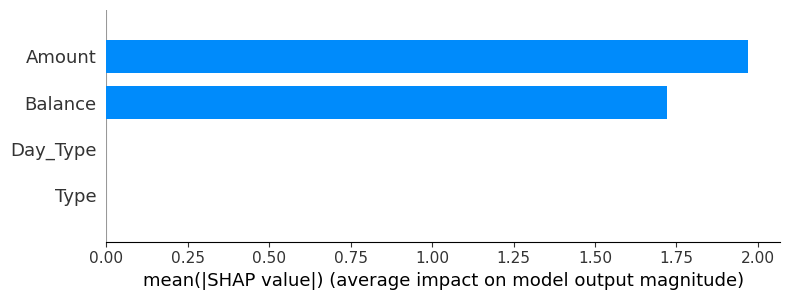

In [91]:
shap.summary_plot(shap_values, X_train, plot_type='bar')

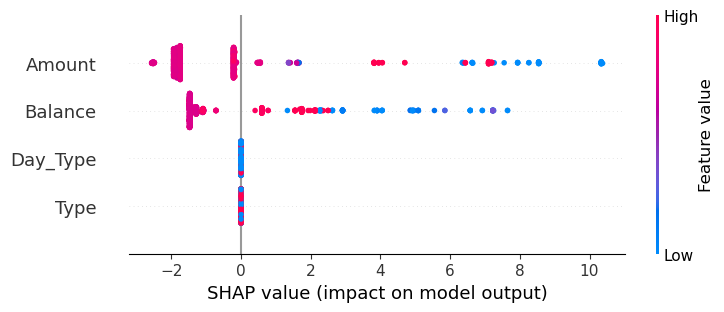

In [92]:
shap.plots.beeswarm(shap_values, max_display=15)

From the above SHAP value, the `risky` transaction is mainly involved by the `Amount` and `Balance`. If the transaction `Amount` is towards negative number (debit), it could increase the potential of the transaction to be considered as `risky` (the one where we want to avoid made by our customer)

## Model Saving

In [93]:
clf

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=300, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [95]:
clf.save_model("Credit_Risk_Assessment_Classifier.model")

# Potential Improvement Points

1. Due to the limited sample data given, creating classification algorithm based on each customer level is not feasible. Currently there are only 3 distinct customers and each customer's bank statement data is not in the same snapshot (different transaction month). However, if the time permits, I would like to explore in creating a classifier based on each customer level's status (bad and good customers ) and the feature for the model is coming from the bank statement activity data (such as number of credit and debit transaction, average income in the last 3 months, number of highest balance and lowest balance, etc). 
2. Syntethic data could help to enable the above process but with the time constraint, I haven't tried this method. Syntethic data could be generated from LLM / Generative-AI to create a better syntethic data  